## ESA CCI Toolbox Reproject Dataset

The purpose of this notebook is to demonstrate how to access a dataset, resample it to different coordinates, and reproject it to a new coordinate reference system (CRS).

To run this Notebook, make sure the ESA CCI Toolbox is setup correctly.

The ESA CCI Toolbox is built on xcube, leveraging many of its functionalities in this notebook. For additional examples on resampling and reprojection, visit the [xcube GitHub repository](https://github.com/xcube-dev/xcube/tree/main/examples/notebooks/resampling).

In [1]:
from xcube.core.gridmapping import GridMapping
from xcube.core.resampling import resample_in_space
from xcube.core.store import new_data_store

<frozen abc>:106: FutureWarning: xarray subclass VectorDataCube should explicitly define __slots__


---
### Reproject Dataset from ESA Open Data Portal

To access datasets from the ESA Open Data Portal store, we begin by initializing a new data store using the store ID 'esa-cci'.

In [2]:
cci_store = new_data_store('esa-cci')

<frozen abc>:106: FutureWarning: xarray subclass VectorDataCube should explicitly define __slots__


All provided data are datasets. So, let's have a look what data sets are available. 

In [3]:
datasets = cci_store.list_data_ids()
datasets

['esacci.AEROSOL.5-days.L3C.AEX.GOMOS.Envisat.AERGOM.3-00.r1',
 'esacci.AEROSOL.climatology.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1',
 'esacci.AEROSOL.day.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.AATSR.Envisat.ADV.2-31.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.AATSR.Envisat.ORAC.04-01-.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.AATSR.Envisat.ORAC.04-01_seg-.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.AATSR.Envisat.SU.4-3.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.ATSR-2.ERS-2.ADV.2-31.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.ATSR-2.ERS-2.ORAC.04-01-.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.ATSR-2.ERS-2.ORAC.04-01_seg-.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.ATSR-2.ERS-2.SU.4-3.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.multi-sensor.multi-platform.AATSR-ENVISAT-ENS_DAILY.v2-6.r1',
 'esacci.AEROSOL.day.L3C.AER_PRODUCTS.multi-sensor.multi-platform.ATSR2-ENVISAT-ENS_DAILY.v2-6.r1',
 'esacci.AEROSOL.day.L3C.AOD.MERIS.Envisat.MERI

We would like to reproject Aerosol CCI product. But first we view the available opening parameters for the respective dataset. 

In [4]:
cci_store.get_open_data_params_schema(
    data_id="esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1"    
)

Now we can open the dataset and select a subset which covers Europe and the last half year of the data.

In [5]:
ds = cci_store.open_data(
    "esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1",
    time_range=["2015-07-01", "2015-12-31"],
    bbox=[0, 45, 20, 60]
)
ds

<xarray.Dataset> Size: 51kB
Dimensions:                           (time: 6, lat: 15, lon: 20, bnds: 2)
Coordinates:
  * lat                               (lat) float32 60B 45.5 46.5 ... 58.5 59.5
  * lon                               (lon) float32 80B 0.5 1.5 ... 18.5 19.5
  * time                              (time) datetime64[ns] 48B 2015-07-16T12...
    time_bnds                         (time, bnds) datetime64[ns] 96B dask.array<chunksize=(6, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    absorbing_aerosol_index           (time, lat, lon) float32 7kB dask.array<chunksize=(1, 15, 20), meta=np.ndarray>
    number_of_observations            (time, lat, lon) float64 14kB dask.array<chunksize=(1, 15, 20), meta=np.ndarray>
    number_of_positive_observations   (time, lat, lon) float64 14kB dask.array<chunksize=(1, 15, 20), meta=np.ndarray>
    positive_absorbing_aerosol_index  (time, lat, lon) float32 7kB dask.array<chunksize=(1, 15, 20), meta=np.ndarray>
    solar_zenith_angle                (time, lat, lon) float32 7kB dask.array<chunksize=(1, 15, 20), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-pla...
    date_created:            2025-03-26T11:58:46.703290
    processing_level:        L3
    time_coverage_start:     2015-07-01T00:00:00
    time_coverage_end:       2016-01-01T00:00:00
    time_coverage_duration:  P184DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

We can plot the absorbing aerosol index in the original projection before reprojecting it. 

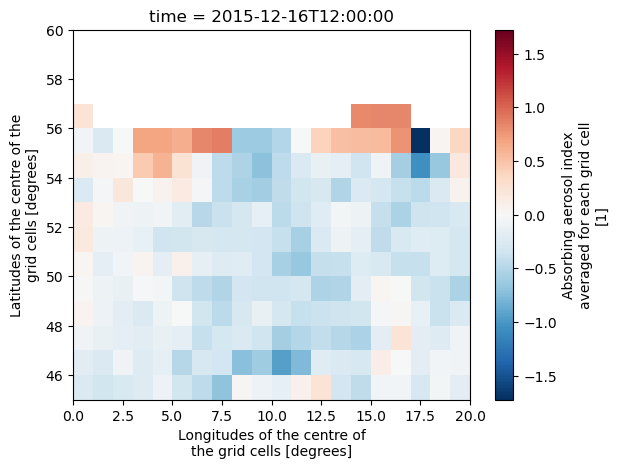

In [6]:
ds.absorbing_aerosol_index.isel(time=-1).plot()

Now, we can reproject the dataset from the original Geographic Coordinate System (EPSG:4326 - WGS 84) to the European Terrestrial Reference System 1989 ensemble (EPSG:3035). To achieve this, we first create a grid mapping that defines the target projection, which is then used to reproject the dataset.  

In [7]:
source_gm = GridMapping.from_dataset(ds)
temp_target_gm = source_gm.transform("EPSG:3035", xy_res=10000)
target_gm = temp_target_gm.to_regular()
target_gm

class: **RegularGridMapping**
* is_regular: True
* is_j_axis_up: False
* is_lon_360: False
* crs: EPSG:3035
* xy_res: (10000, 10000)
* xy_bbox: (3528853, 2427033, 5118853, 4157033)
* ij_bbox: (0, 0, 159, 173)
* xy_dim_names: ('x', 'y')
* xy_var_names: ('x', 'y')
* size: (159, 173)
* tile_size: (20, 15)

In [8]:
ds_reproject = resample_in_space(
    ds,
    source_gm=source_gm,
    target_gm=target_gm,
)
ds_reproject

<xarray.Dataset> Size: 5MB
Dimensions:                           (time: 6, y: 173, x: 159, bnds: 2)
Coordinates:
  * time                              (time) datetime64[ns] 48B 2015-07-16T12...
  * y                                 (y) float64 1kB 4.152e+06 ... 2.432e+06
  * x                                 (x) float64 1kB 3.534e+06 ... 5.114e+06
    x_bnds                            (x, bnds) float64 3kB 3.529e+06 ... 5.1...
    y_bnds                            (y, bnds) float64 3kB 4.157e+06 ... 2.4...
Dimensions without coordinates: bnds
Data variables:
    absorbing_aerosol_index           (time, y, x) float32 660kB dask.array<chunksize=(6, 15, 20), meta=np.ndarray>
    number_of_observations            (time, y, x) float64 1MB dask.array<chunksize=(6, 15, 20), meta=np.ndarray>
    number_of_positive_observations   (time, y, x) float64 1MB dask.array<chunksize=(6, 15, 20), meta=np.ndarray>
    positive_absorbing_aerosol_index  (time, y, x) float32 660kB dask.array<chunksize=(6, 15, 20), meta=np.ndarray>
    solar_zenith_angle                (time, y, x) float32 660kB dask.array<chunksize=(6, 15, 20), meta=np.ndarray>
    crs                               int64 8B 0
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-pla...
    date_created:            2025-03-26T11:58:46.703290
    processing_level:        L3
    time_coverage_start:     2015-07-01T00:00:00
    time_coverage_end:       2016-01-01T00:00:00
    time_coverage_duration:  P184DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

Finally, we can plot the reprojected dataset.

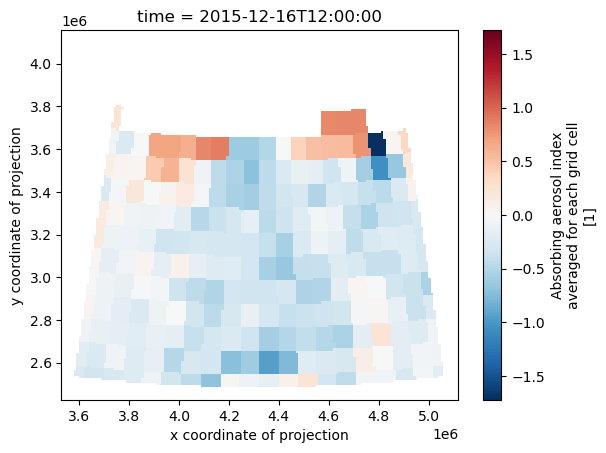

In [11]:
ds_reproject.absorbing_aerosol_index.isel(time=-1).plot()